<a href="https://colab.research.google.com/github/flowergum/NN/blob/task2_1/NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


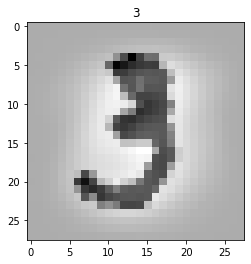

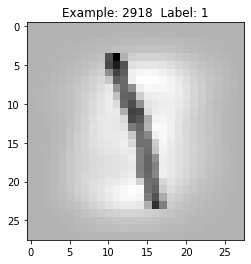

In [62]:


import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt
(x_train, y_train),(x_test, y_test) = mnist.load_data()

def feature_normalize(train_X):
    global mean, std
    mean = np.mean(train_X, axis=0)
    std = np.std(train_X, axis=0)
    return np.nan_to_num((train_X - mean) / std)

x_train, x_test = feature_normalize(x_train), feature_normalize(x_test)
x_train.shape
plt.title(y_train[10])
plt.imshow(x_train[10], cmap=plt.get_cmap('gray_r'))
plt.show()


def display_digit(num):
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()


display_digit(2918)
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])




In [63]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3180 - accuracy: 0.9117
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1805 - accuracy: 0.9513
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1408 - accuracy: 0.9595
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1174 - accuracy: 0.9659
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1085 - accuracy: 0.9685


In [64]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))
predictions = model.predict(x_test[0:1,:,:])
print(predictions)
print(y_test[0])

model.evaluate(x_test, y_test)
#model.summary()

313/313 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.9719
Loss = 0.14493794739246368, accuracy = 0.9718999862670898
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0480 - accuracy: 0.9863
Loss = 0.04798605665564537, accuracy = 0.9863166809082031
[[5.15462839e-10 1.08215379e-14 1.95871124e-08 3.80663255e-06
  6.51489436e-17 1.76468421e-12 1.02568775e-16 9.99996066e-01
  1.47182388e-09 1.09486137e-07]]
7
313/313 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.9719


[0.14493794739246368, 0.9718999862670898]